grupa: poniedziałek

członkowie zespołu: Franek Sakowski i Miłosz Łopatto

# Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import torch.utils.data as data
import torch
from torch import nn, optim
import torch.nn.functional as F
import tqdm
from tqdm import tnrange
import copy

# read training data

In [25]:
df = pd.read_csv('data.csv')

## EDA and visualizations

In [26]:
# sns.pairplot(data)

/var/folders/v7/7b5vyv797kg9pf47h5zx_wxr0000gn/T/ipykernel_61835/1290743455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


<AxesSubplot: >

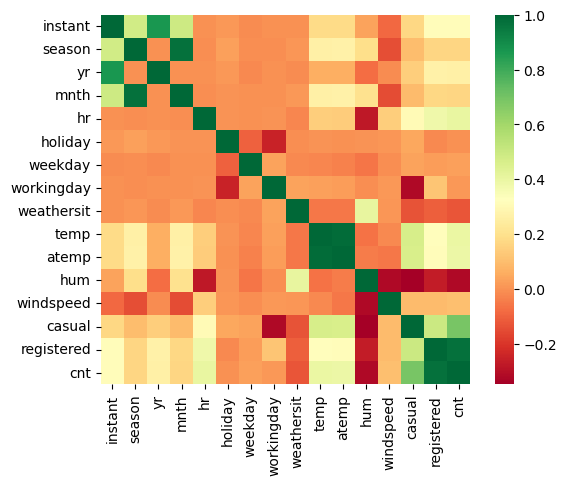

In [27]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [28]:
df = df.drop(columns='dteday')

In [29]:
df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,17089,4,1,12,19,0,3,1,1,0.38,0.3939,0.50,0.3881,7,329,336
10882,17090,4,1,12,20,0,3,1,1,0.36,0.3485,0.57,0.2239,10,231,241
10883,17091,4,1,12,21,0,3,1,1,0.34,0.3182,0.61,0.2239,4,164,168
10884,17092,4,1,12,22,0,3,1,1,0.34,0.3485,0.61,0.0896,12,117,129


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     10886 non-null  int64  
 1   season      10886 non-null  int64  
 2   yr          10886 non-null  int64  
 3   mnth        10886 non-null  int64  
 4   hr          10886 non-null  int64  
 5   holiday     10886 non-null  int64  
 6   weekday     10886 non-null  int64  
 7   workingday  10886 non-null  int64  
 8   weathersit  10886 non-null  int64  
 9   temp        10886 non-null  float64
 10  atemp       10886 non-null  float64
 11  hum         10886 non-null  float64
 12  windspeed   10886 non-null  float64
 13  casual      10886 non-null  int64  
 14  registered  10886 non-null  int64  
 15  cnt         10886 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 1.3 MB


In [31]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,8537.421183,2.506614,0.501929,6.521495,11.541613,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036,36.021955,155.552177,191.574132
std,5026.363303,1.116174,0.500019,3.444373,6.915838,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859,49.960477,151.039033,181.144454
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4282.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,36.000000,42.000000
50%,8666.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,17.000000,118.000000,145.000000
75%,13016.750000,4.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700,49.000000,222.000000,284.000000
max,17093.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700,367.000000,886.000000,977.000000


# Constants

In [32]:
USE_MPS_GPU = True  # device whether to use MPS gpu if available

# Connect to GPU if available

In [33]:
import platform

platform.platform()

'macOS-12.6-arm64-arm-64bit'

In [34]:
if torch.has_mps and USE_MPS_GPU:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

device

device(type='cpu')

In [35]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

if torch.backends.mps.is_available() and USE_MPS_GPU:
    torch.backends.mps.manual_seed(42)
    torch.backends.mps.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False
torch.backends.mps.deterministic = True
torch.backends.mps.benchmark = False

# Prepare data

### Convert all values into float:

In [36]:
df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,17089,4,1,12,19,0,3,1,1,0.38,0.3939,0.50,0.3881,7,329,336
10882,17090,4,1,12,20,0,3,1,1,0.36,0.3485,0.57,0.2239,10,231,241
10883,17091,4,1,12,21,0,3,1,1,0.34,0.3182,0.61,0.2239,4,164,168
10884,17092,4,1,12,22,0,3,1,1,0.34,0.3485,0.61,0.0896,12,117,129


In [37]:
df = df.astype(float)

### Scale all values :

In [38]:
quality_backup = df[['casual', 'registered', 'cnt']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled[['casual', 'registered', 'cnt']] = quality_backup #restore quality values

In [39]:
df_scaled.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.499440,0.502205,0.501929,0.501954,0.501809,0.028569,0.499770,0.680875,0.139476,0.483098,0.512252,0.618865,0.224563,36.021955,155.552177,191.574132
std,0.294077,0.372058,0.500019,0.313125,0.300689,0.166599,0.334628,0.466159,0.211280,0.193917,0.189610,0.192450,0.143245,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.250483,0.333333,0.000000,0.272727,0.260870,0.000000,0.166667,0.000000,0.000000,0.326531,0.355856,0.470000,0.122840,4.000000,36.000000,42.000000
50%,0.506992,0.666667,1.000000,0.545455,0.521739,0.000000,0.500000,1.000000,0.000000,0.489796,0.525338,0.620000,0.228047,17.000000,118.000000,145.000000
75%,0.761511,1.000000,1.000000,0.818182,0.782609,0.000000,0.833333,1.000000,0.333333,0.632653,0.677928,0.770000,0.298225,49.000000,222.000000,284.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


In [40]:
row_index_threshold = round(0.8 * len(df.index))
train = df_scaled.iloc[:row_index_threshold]
val = df_scaled.iloc[row_index_threshold:]

In [41]:
print(train.shape)
print(val.shape)

(8709, 16)
(2177, 16)


### Split features and labels :

In [42]:
X_train, y_train_casual, y_train_registered, y_train_cnt = train.drop(['casual', 'registered', 'cnt'], axis=1), train['casual'], train['registered'], train['cnt']
print(X_train.shape)

X_val, y_val_casual, y_val_registered, y_val_cnt = val.drop(['casual', 'registered', 'cnt'], axis=1), val['casual'], val['registered'], val['cnt']
print(X_val.shape)

(8709, 13)
(2177, 13)


### Split into batches :

In [43]:
f=40 # number of batches

train_batch = np.array_split(X_train, f) 
label_batch = np.array_split(y_train_cnt, f) # 50 sections/batches

val_batch = np.array_split(X_val, f)
val_label_batch = np.array_split(y_val_cnt, f)


for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)
    
for i in range(len(val_batch)):
    val_batch[i] = torch.from_numpy(val_batch[i].values).float()
for i in range(len(val_label_batch)):
    val_label_batch[i] = torch.from_numpy(val_label_batch[i].values).float().view(-1, 1)
    
print("Batch size:", len(train_batch[0]))


Batch size: 218


/Users/milosz/opt/miniconda3/envs/pt/lib/python3.9/site-packages/numpy/lib/shape_base.py:790: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


### The Model :

In [44]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(13, 60)
        self.fc2 = nn.Linear(60, 1)

        self.dropout = nn.Dropout(0.20)
       
    def forward(self, x):
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))

        return x

model = Regressor()
train_losses, val_losses = [], []
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # 0.015 87
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=15) 
total_epochs=0

### The training loop :

In [45]:
best_model = copy.deepcopy(model)
best_val_loss = None

In [46]:
#print(model)
epochs = 1000
total_epochs+=epochs

model.train()

for e in tnrange(epochs):
    
    train_loss = 0
    val_loss_1 = 0
    val_loss_sum = 0
    
    for i in range(len(train_batch)):
        
        train_batch = train_batch.to(device)
        output = model(train_batch[i])
        loss = criterion(output, label_batch[i])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
        with torch.no_grad():
            
            for j in range(len(val_batch)):
                
                val_output = model(val_batch[j])
                val_loss =  criterion(val_output, val_label_batch[j])
                val_loss_1+=val_loss.item()
        val_loss_sum=val_loss_1/len(val_batch)
        
    # saving best model
    val_loss_divided = val_loss_sum/len(val_batch)
    if best_val_loss is None or val_loss_divided < best_val_loss:
        print('Model replaced')
        best_val_loss = val_loss_divided
        best_model = copy.deepcopy(model)
    print("Epoch :", e, "train_loss :", train_loss/len(train_batch), "Val loss: ", val_loss_divided)    
    val_losses.append(val_loss_divided)    
    train_losses.append(train_loss/len(train_batch))   

/var/folders/v7/7b5vyv797kg9pf47h5zx_wxr0000gn/T/ipykernel_61835/1962896359.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for e in tnrange(epochs):


  0%|          | 0/1000 [00:00<?, ?it/s]

Model replaced
Epoch : 0 train_loss : 56695.59049072266 Val loss:  113088.98022949218
Model replaced
Epoch : 1 train_loss : 30964.771270751953 Val loss:  65680.5636669922
Model replaced
Epoch : 2 train_loss : 27777.137939453125 Val loss:  51741.238685302735
Model replaced
Epoch : 3 train_loss : 26890.373974609374 Val loss:  50813.23695800781
Model replaced
Epoch : 4 train_loss : 26261.21389160156 Val loss:  49303.945515136715
Model replaced
Epoch : 5 train_loss : 25324.448828125 Val loss:  48859.42853271485
Model replaced
Epoch : 6 train_loss : 24906.74609375 Val loss:  48331.39461914062
Model replaced
Epoch : 7 train_loss : 24417.446643066407 Val loss:  47946.137923583985
Model replaced
Epoch : 8 train_loss : 24574.982946777345 Val loss:  47835.61749389648
Model replaced
Epoch : 9 train_loss : 24576.5103515625 Val loss:  47121.937769165044
Model replaced
Epoch : 10 train_loss : 23907.597387695314 Val loss:  46796.06634277344
Model replaced
Epoch : 11 train_loss : 23765.219128417968 Va

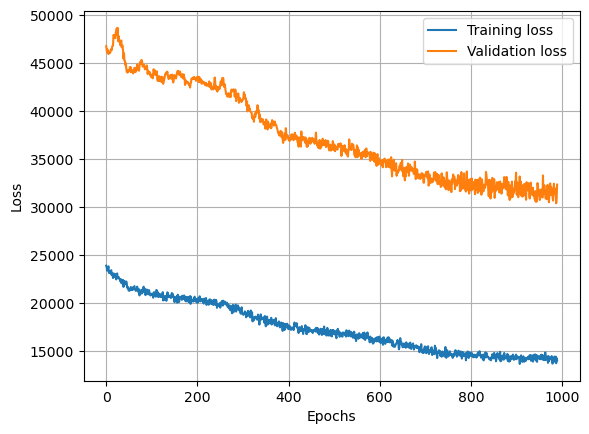

In [47]:
### Training Metrics :
frm=10 # does not 
plt.plot(train_losses[frm:], label='Training loss')
plt.plot(val_losses[frm:], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

### save model

In [48]:
state_dict = model.state_dict()
torch.save(state_dict, "saved_model.tar")